In [1]:
import pandas as pd
import numpy as np
import os
import math

from pathlib import Path
#import pickle
import sys
import joblib
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error,explained_variance_score

# preproceessing
#from model_transformers2 import FeaturesInteractions,SkewTransformer,ZeroThreshold
#from stacking_models import StackingAveragedModels,AveragingModels

import seaborn as sns

#from mlxtend.plotting import plot_linear_regression
%matplotlib inline


In [2]:
adapt_features = pd.read_csv('../data/ADAPT_3bdy_Test15.csv',index_col=0)
abpred_features = pd.read_csv('../benchmark/adapt_analysis/3bdy_features.csv',index_col=0)


In [3]:
# abpred results predictions
adapt_results = pd.read_csv('../benchmark/adapt_analysis/mutations_results.csv',index_col=0)
adapt_results.reset_index(inplace=True)
adapt_results["mutant"] = adapt_results.iloc[:,0].str.split('.',expand=True)[2]

# adapt paper dataframe
adapt_dataframe = pd.read_csv('../data/3bdy_adapt.csv',sep=";")
# add new column to match models named mutation
adapt_dataframe["mutant"] = adapt_dataframe["Chain"]+adapt_dataframe["Mutation"].str[1:]
adapt_dataframe.sort_values(by="mutant",inplace=True)


# merge dataframe info
pred_data = adapt_results.merge(adapt_dataframe,on='mutant')
pred_data.rename(columns={'ddG':'ddG_exp','ddg':'ddG_model1'},inplace=True)
pred_data['ddG_exp'] = pred_data['ddG_exp'].astype(float)

In [7]:
pipe_loaded = joblib.load('stack_lasso-gbt-svrRBF-svrPoly-xgb.pkl')

# Predict using loaded Pipeline
y_pred_pipe_loaded = pipe_loaded.predict(abpred_features)

In [12]:
pred_data

,index,ddG_model1,mutant,Mutation,Chain,z-score,Kwt (nM),Kwt/K,ddG_exp
0,3bdy.renum.H33M.Repair4.clean.mut.pdb,-0.082758,H33M,Y33M,H,-1.8,44,1.0,0.03
1,3bdy.renum.H33W.Repair4.clean.mut.pdb,0.151825,H33W,Y33W,H,-2.4,44,1.2,-0.09
2,3bdy.renum.H52R.Repair4.clean.mut.pdb,0.200408,H52R,Y52R,H,-2.4,44,0.6,0.30
3,3bdy.renum.H98F.Repair4.clean.mut.pdb,0.165425,H98F,D98F,H,-6.8,44,7.4,-1.18
4,3bdy.renum.H98H.Repair4.clean.mut.pdb,0.162227,H98H,D98H,H,-4.3,44,2.9,-0.62
5,3bdy.renum.H98K.Repair4.clean.mut.pdb,0.183141,H98K,D98K,H,-4.1,44,2.9,-0.63
6,3bdy.renum.H98M.Repair4.clean.mut.pdb,-0.208359,H98M,D98M,H,-6.5,44,9.5,-1.33
7,3bdy.renum.H98W.Repair4.clean.mut.pdb,0.152228,H98W,D98W,H,-8.5,44,8.0,-1.23
8,3bdy.renum.H98Y.Repair4.clean.mut.pdb,0.045912,H98Y,D98Y,H,-6.4,44,3.8,-0.76
9,3bdy.renum.H99D.Repair4.clean.mut.pdb,-0.188048,H99D,G99D,H,-1.6,44,2.2,-0.48


In [13]:
abpred_features

,clash,covalent,vdw_clash,vdw,proximal,hbond,weak_hbond,xbond,ionic,metal_complex,...,interface_residues_mut,interface_residues_clashing_mut,interface_residues_vdw_clashing_mut,interface_residues_bb_clashing_mut,if_phil,if_phob,if_total,sasa_phil,sasa_phob,sasa_total
3bdy.renum.H33M.Repair4.clean.mut.pdb,0.0,0.0,14.0,3.0,501.0,9.0,8.0,0.0,0.0,0.0,...,34.0,0.0,0.0,0.0,149.375,345.320,494.700,8331.43,19111.73,27443.15
3bdy.renum.H33W.Repair4.clean.mut.pdb,0.0,0.0,14.0,3.0,506.0,10.0,8.0,0.0,0.0,0.0,...,33.0,0.0,0.0,0.0,148.420,347.405,495.825,8301.99,19109.88,27411.87
3bdy.renum.H52R.Repair4.clean.mut.pdb,0.0,0.0,14.0,4.0,473.0,9.0,7.0,0.0,0.0,0.0,...,33.0,0.0,0.0,0.0,148.155,347.320,495.470,8309.46,19161.23,27470.69
3bdy.renum.H98F.Repair4.clean.mut.pdb,0.0,0.0,14.0,3.0,522.0,9.0,9.0,0.0,0.0,0.0,...,35.0,0.0,0.0,0.0,170.135,331.085,501.220,8384.96,19040.20,27425.16
3bdy.renum.H98H.Repair4.clean.mut.pdb,0.0,0.0,16.0,3.0,527.0,9.0,10.0,0.0,0.0,0.0,...,35.0,0.0,0.0,0.0,148.015,349.525,497.540,8310.19,19155.37,27465.56
3bdy.renum.H98K.Repair4.clean.mut.pdb,0.0,0.0,14.0,3.0,515.0,9.0,9.0,0.0,0.0,0.0,...,33.0,0.0,0.0,0.0,148.655,347.090,495.750,8314.47,19181.46,27495.92
3bdy.renum.H98M.Repair4.clean.mut.pdb,0.0,0.0,14.0,4.0,517.0,9.0,9.0,0.0,0.0,0.0,...,35.0,0.0,0.0,0.0,168.095,330.465,498.555,8388.59,19043.71,27432.30
3bdy.renum.H98W.Repair4.clean.mut.pdb,0.0,0.0,14.0,6.0,541.0,9.0,9.0,0.0,0.0,0.0,...,35.0,0.0,0.0,0.0,145.105,362.605,507.710,8290.53,19135.34,27425.87
3bdy.renum.H98Y.Repair4.clean.mut.pdb,0.0,0.0,15.0,4.0,523.0,9.0,9.0,0.0,0.0,0.0,...,35.0,0.0,0.0,0.0,147.320,352.935,500.255,8305.24,19147.49,27452.73
3bdy.renum.H99D.Repair4.clean.mut.pdb,0.0,0.0,20.0,5.0,526.0,11.0,10.0,0.0,2.0,0.0,...,35.0,0.0,0.0,0.0,131.820,371.735,503.555,8276.73,19198.33,27475.06


In [80]:
explained_variance_score(pred_data["ddG_exp"],pred_data["ddG_model1"])

-0.019147689433347104

In [9]:
explained_variance_score(pred_data["ddG_exp"],y_pred_pipe_loaded)

ValueError: Found input variables with inconsistent numbers of samples: [12, 15]

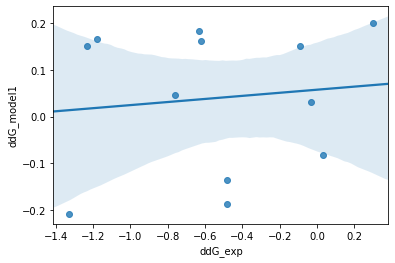

In [81]:
sns.regplot(pred_data["ddG_exp"],pred_data["ddG_model1"])

In [91]:
mcsm_result = pd.read_table("../data/3bdy_mcsm_results.txt")


In [92]:
with open("../data/3bdy.pdb.beat.txt","r") as f:
    lines = f.readlines()
    ddg_values = [float(list(filter(lambda name: name.strip(), l.split(" ")))[7]) for l in lines ]
    chain =  [list(filter(lambda name: name.strip(), l.split(" ")))[2] for l in lines ]
    mut_res = [list(filter(lambda name: name.strip(), l.split(" ")))[5] for l in lines ]
    num_res = [list(filter(lambda name: name.strip(), l.split(" ")))[3] for l in lines ]
    
    mutant = list(map("".join, zip(chain, num_res,mut_res)))
    
    pd_beatmusic = pd.DataFrame({"mutant":mutant,"beat_pred":ddg_values})
    
    

In [95]:
mcsm_result["mutant"]= mcsm_result["CHAIN"].astype(str)+mcsm_result["RES_POS"].astype(str)+mcsm_result["MUT_RES"].astype(str)
mcsm_result = mcsm_result[["PRED_DDG","mutant"]]
#merge data on mutant column
pred_data["mutant"] = pred_data.reset_index()["index"].str.split(".",expand=True)[2].values

In [96]:
pred_data

,index,ddG_model1,mutant,Mutation,Chain,z-score,Kwt (nM),Kwt/K,ddG_exp
0,3bdy.renum.H33M.Repair4.clean.mut.pdb,-0.082758,H33M,Y33M,H,-1.8,44,1.0,0.03
1,3bdy.renum.H33W.Repair4.clean.mut.pdb,0.151825,H33W,Y33W,H,-2.4,44,1.2,-0.09
2,3bdy.renum.H52R.Repair4.clean.mut.pdb,0.200408,H52R,Y52R,H,-2.4,44,0.6,0.30
3,3bdy.renum.H98F.Repair4.clean.mut.pdb,0.165425,H98F,D98F,H,-6.8,44,7.4,-1.18
4,3bdy.renum.H98H.Repair4.clean.mut.pdb,0.162227,H98H,D98H,H,-4.3,44,2.9,-0.62
5,3bdy.renum.H98K.Repair4.clean.mut.pdb,0.183141,H98K,D98K,H,-4.1,44,2.9,-0.63
6,3bdy.renum.H98M.Repair4.clean.mut.pdb,-0.208359,H98M,D98M,H,-6.5,44,9.5,-1.33
7,3bdy.renum.H98W.Repair4.clean.mut.pdb,0.152228,H98W,D98W,H,-8.5,44,8.0,-1.23
8,3bdy.renum.H98Y.Repair4.clean.mut.pdb,0.045912,H98Y,D98Y,H,-6.4,44,3.8,-0.76
9,3bdy.renum.H99D.Repair4.clean.mut.pdb,-0.188048,H99D,G99D,H,-1.6,44,2.2,-0.48


In [105]:
pred_data_final = pred_data.merge(mcsm_result,on="mutant").merge(pd_beatmusic,on="mutant")
pred_data_final.set_index("mutant",inplace=True)
pred_data_final.drop(columns=['index','Mutation','Chain','Kwt (nM)','Kwt/K'],inplace=True)

In [106]:
pred_data_final

,ddG_model1,z-score,ddG_exp,PRED_DDG,beat_pred
mutant,,,,,
H33M,-0.082758,-1.8,0.03,0.597,1.16
H33W,0.151825,-2.4,-0.09,1.220,0.62
H52R,0.200408,-2.4,0.30,-0.280,0.79
H98F,0.165425,-6.8,-1.18,0.281,0.22
H98H,0.162227,-4.3,-0.62,-1.387,0.12
H98K,0.183141,-4.1,-0.63,-0.299,0.09
H98M,-0.208359,-6.5,-1.33,-0.921,0.19
H98W,0.152228,-8.5,-1.23,0.480,0.18
H98Y,0.045912,-6.4,-0.76,0.265,0.22


In [114]:
print('Explained Variance ddG_exp/ddG_model1',explained_variance_score(pred_data_final["ddG_exp"],pred_data_final["ddG_model1"]))
print('Explained Variance ddG_exp/beat_pred',explained_variance_score(pred_data_final["ddG_exp"],pred_data_final["beat_pred"]))
print('Explained Variance ddG_exp/PRED_DDG',explained_variance_score(pred_data_final["ddG_exp"],pred_data_final["PRED_DDG"]))

Explained Variance ddG_exp/ddG_model1 -0.019147689433347104
Explained Variance ddG_exp/beat_pred 0.42353209168121997
Explained Variance ddG_exp/PRED_DDG -1.9366376682684487


In [116]:
r2_score(pred_data_final["ddG_exp"],pred_data_final["ddG_model1"])

-1.3399267557258616

In [ ]:
r2_score

In [108]:
print('Explained Variance ddG_exp/ddG_model1',explained_variance_score(pred_data_final["ddG_exp"],pred_data_final["ddG_model1"]))
print('Explained Variance ddG_exp/beat_pred',explained_variance_score(pred_data_final["ddG_exp"],pred_data_final["beat_pred"]))
print('Explained Variance ddG_exp/PRED_DDG',explained_variance_score(pred_data_final["ddG_exp"],pred_data_final["PRED_DDG"]))

0.42353209168121997

In [110]:
np.sqrt(pred_data_final.apply(mean_squared_error,axis=0,args=(pred_data_final["ddG_exp"],)))

ddG_model1    0.774086
z-score       4.531425
ddG_exp       0.000000
PRED_DDG      1.221904
beat_pred     0.984717
dtype: float64

In [98]:
pred_data_final.corr()

,ddG_model1,z-score,Kwt (nM),ddG_exp,PRED_DDG,beat_pred
ddG_model1,1.000000,-0.225626,NaN,0.113040,-0.310408,-0.035848
z-score,-0.225626,1.000000,NaN,0.632829,0.273251,0.467480
Kwt (nM),NaN,NaN,NaN,NaN,NaN,NaN
ddG_exp,0.113040,0.632829,NaN,1.000000,0.304147,0.651116
PRED_DDG,-0.310408,0.273251,NaN,0.304147,1.000000,0.209852
beat_pred,-0.035848,0.467480,NaN,0.651116,0.209852,1.000000


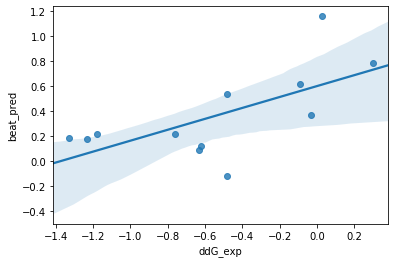

In [97]:
sns.regplot(pred_data_final["ddG_exp"],pred_data_final["beat_pred"])